In [23]:
from obspy.clients.seedlink import Client as SeedlinkClient
from obspy import UTCDateTime
from obspy import Stream
from obspy import read_inventory
from math import radians, sin, cos, atan2, sqrt, degrees

In [24]:


server_ip = "172.19.3.69"
client = SeedlinkClient(server_ip)

time = [UTCDateTime('2024-06-19T00:11:00.150000Z')
        ]
for i in range(len(time)):
        time[i] = time[i]-7*60*60

stations = ['JAGI','GRJI','BAPJI','BUJI','CMJI','GKJM','WGJM','PRLJI','MKJM','PCJI','PRJI','PGJM','SAKJI','SCJI','SYJI','TAGJI','TBJI','UGM','PLJI','MAKBI']

waveform = []

In [25]:
for t in time:
    for station in stations:
        if station == 'GKJM' or station == 'MKJM' or station == 'YOGI':
            loc = '00'
        else:
            loc = ''

        if station == 'YOGI':
            channel = 'BHZ'
        else:
            channel = 'SHZ'

        st = client.get_waveforms("IA", station, loc, channel, t-0*60, t+3*60)
        waveform.append(st)

socket read error: timed out, reconnecting in 30ss
terminating collect loop


In [26]:
traces = Stream()

In [27]:
for w in waveform:
    if len(w) > 0:
        for i in range(len(w)):
            traces.append(w[i])

In [28]:
traces

19 Trace(s) in Stream:
IA.JAGI..SHZ   | 2024-06-18T17:11:00.148393Z - 2024-06-18T17:14:00.148393Z | 50.0 Hz, 9001 samples
IA.GRJI..SHZ   | 2024-06-18T17:11:00.150000Z - 2024-06-18T17:14:00.150000Z | 40.0 Hz, 7201 samples
IA.BAPJI..SHZ  | 2024-06-18T17:11:00.160000Z - 2024-06-18T17:14:00.140000Z | 50.0 Hz, 9000 samples
IA.BUJI..SHZ   | 2024-06-18T17:11:00.146860Z - 2024-06-18T17:14:00.146860Z | 40.0 Hz, 7201 samples
IA.CMJI..SHZ   | 2024-06-18T17:11:00.150000Z - 2024-06-18T17:14:00.150000Z | 40.0 Hz, 7201 samples
IA.GKJM.00.SHZ | 2024-06-18T17:11:00.150000Z - 2024-06-18T17:14:00.150000Z | 40.0 Hz, 7201 samples
IA.WGJM.00.SHZ | 2024-06-18T17:11:00.150000Z - 2024-06-18T17:14:00.150000Z | 40.0 Hz, 7201 samples
IA.PRLJI..SHZ  | 2024-06-18T17:11:00.150000Z - 2024-06-18T17:14:00.150000Z | 40.0 Hz, 7201 samples
IA.MKJM.00.SHZ | 2024-06-18T17:11:00.150000Z - 2024-06-18T17:14:00.150000Z | 40.0 Hz, 7201 samples
IA.PCJI..SHZ   | 2024-06-18T17:11:00.150000Z - 2024-06-18T17:14:00.150000Z | 40.0 Hz, 

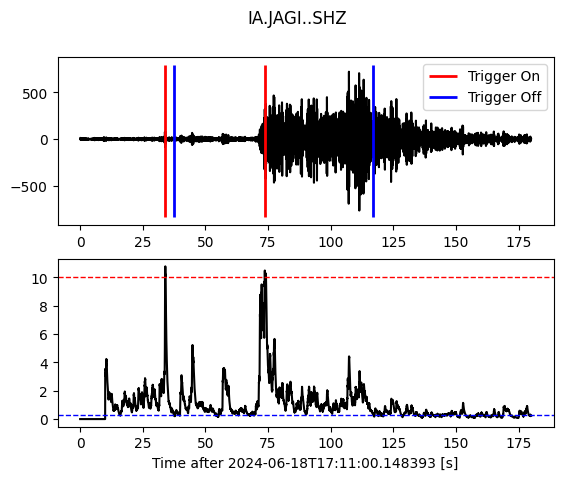

Before: -81.28901950989753
Trigger: -86.43888450226754
After: -28.685016345190316


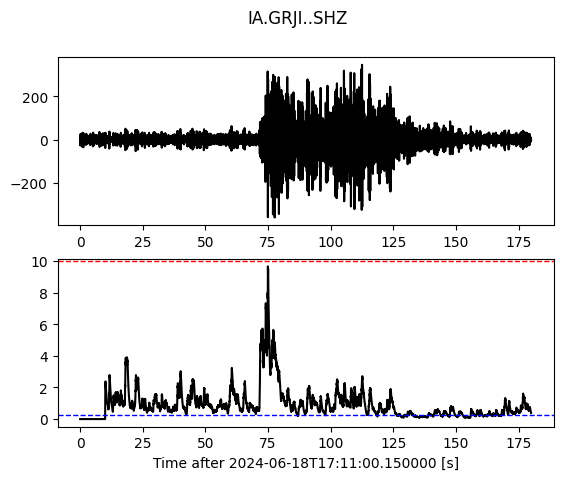

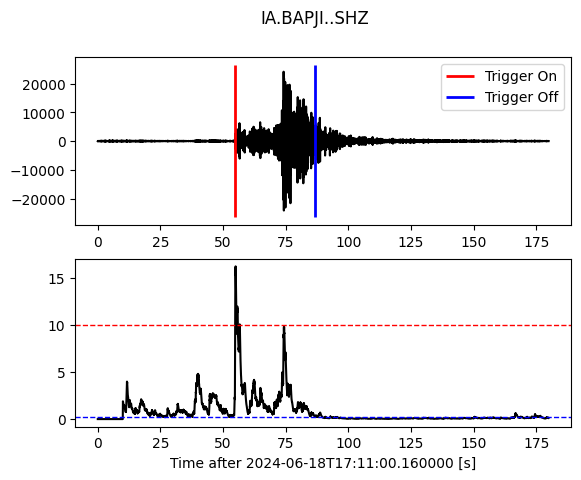

Before: -896.9560849289696
Trigger: -1618.8501987201796
After: -1495.4279970256462


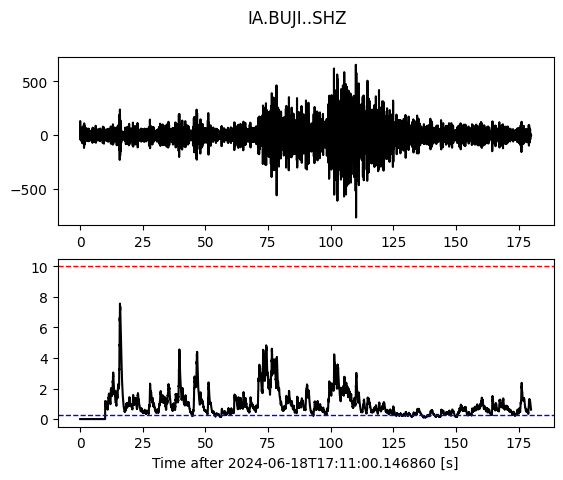

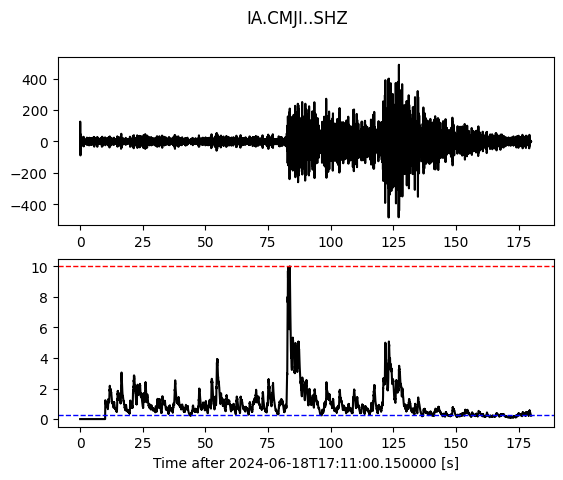

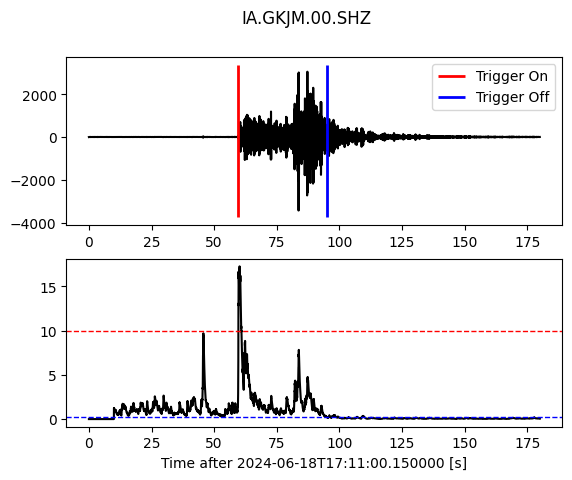

Before: -27.047948033436732
Trigger: -52.435469726997844
After: -38.76937602992917


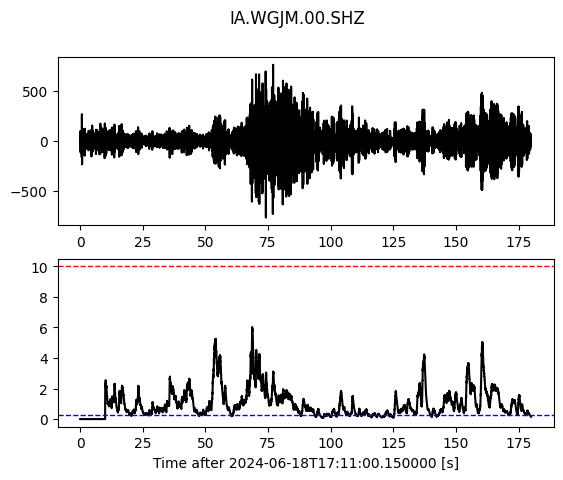

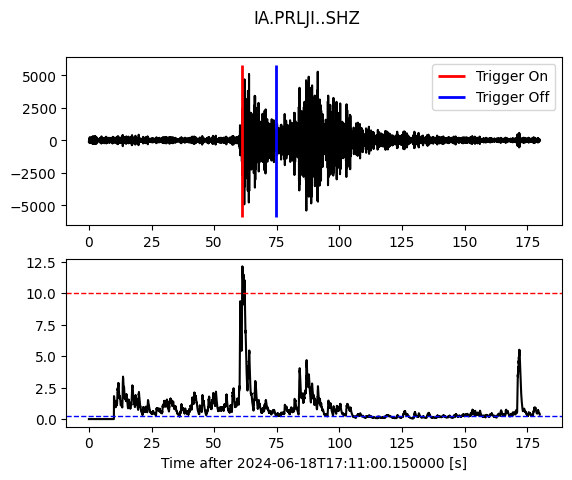

Before: 922.9018324208942
Trigger: 2258.8256022531996
After: 2032.1545118223955


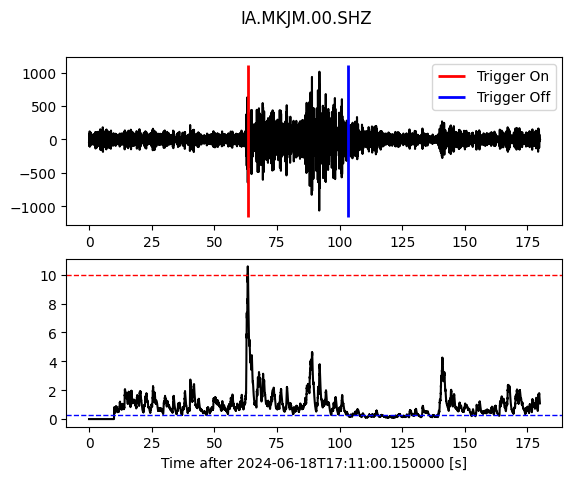

Before: -510.95267651975917
Trigger: -646.5711973270814
After: -315.6614810204579


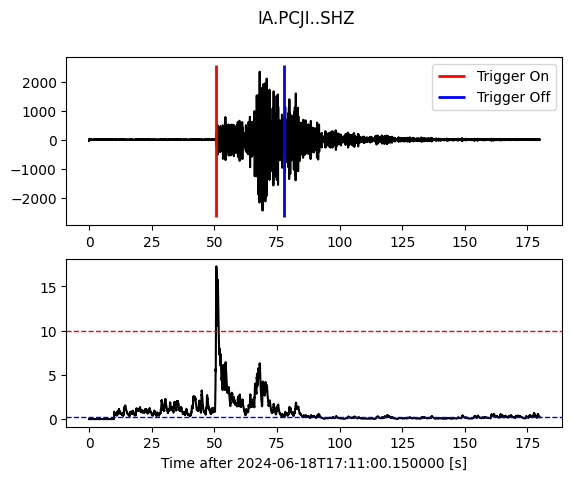

Before: 55.84765635444978
Trigger: 54.05626696681172
After: -3.3299235367626894


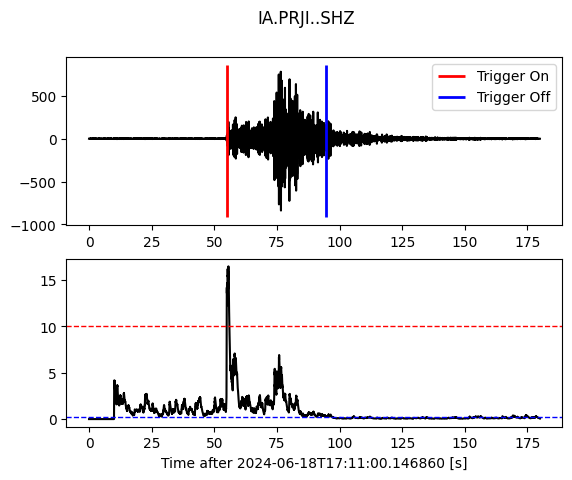

Before: -6.4887467305552935
Trigger: 19.46573505773293
After: 36.60502542394066


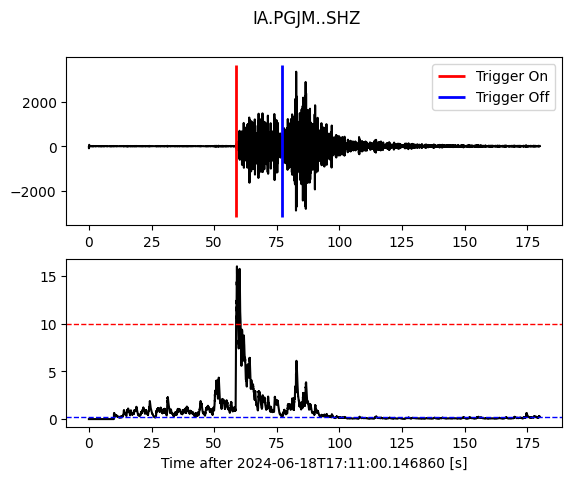

Before: -46.45907334210359
Trigger: -65.94907258629203
After: -30.075529000681726


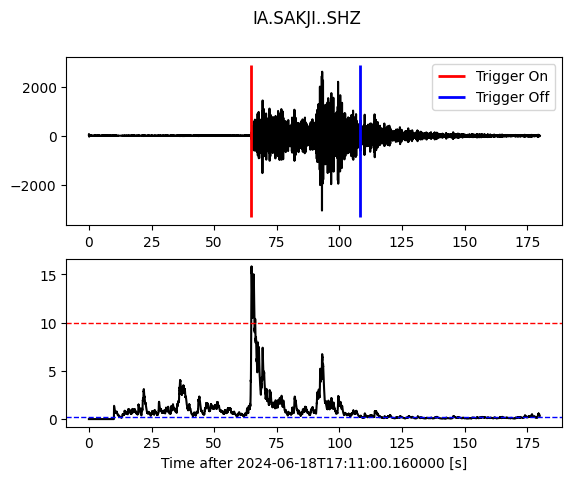

Before: 74.3137542382355
Trigger: 98.84675121819015
After: 74.81444196854765


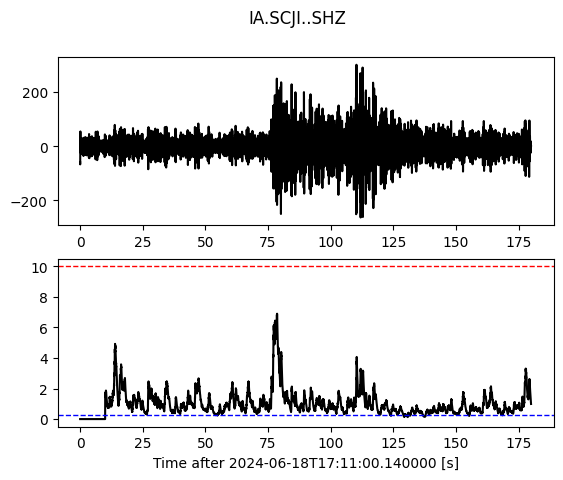

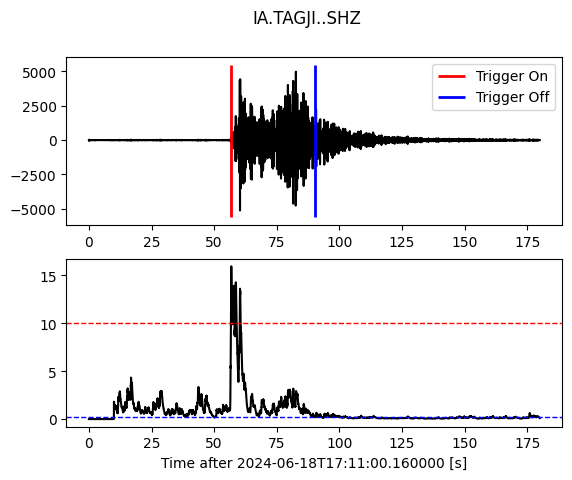

Before: 64.56820385893853
Trigger: 119.00144751682889
After: 88.48675953370875


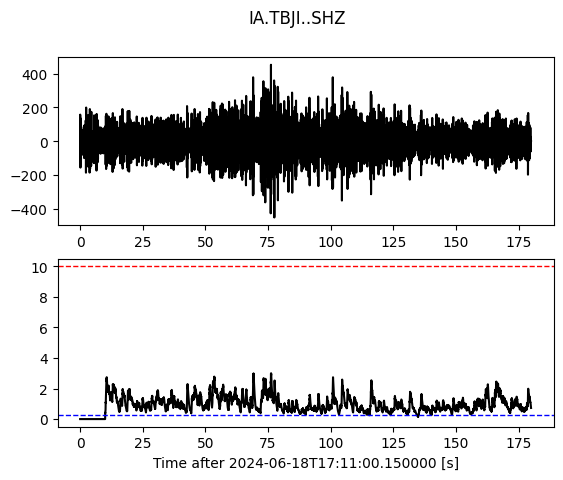

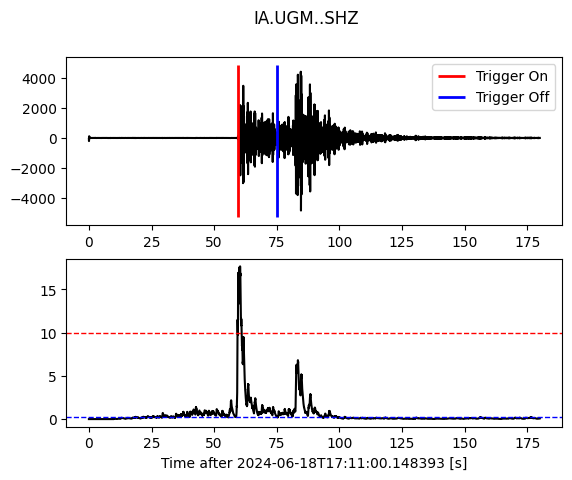

Before: 29.377004771733233
Trigger: 35.83489935378611
After: 25.928857053120634


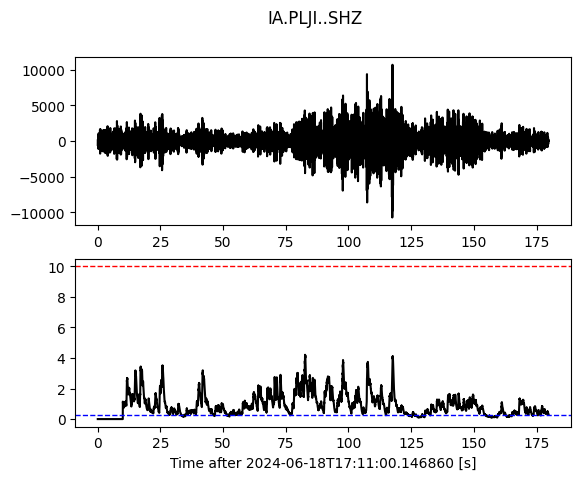

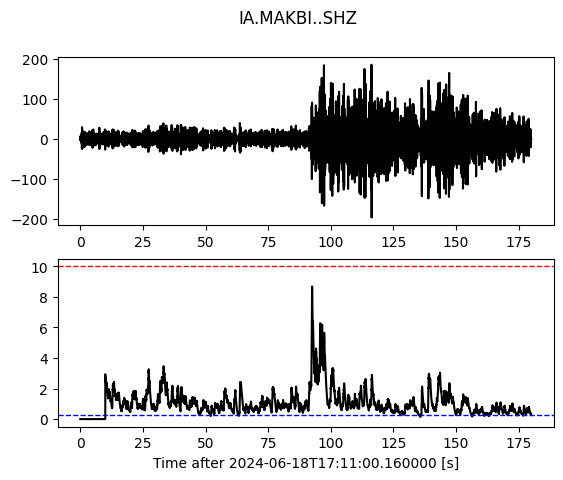

In [29]:
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import recursive_sta_lta, trigger_onset
import numpy as np
list_peak = []
for tra in traces:
    station_trig = tra.stats.station
    of = 0.26
    on = 10
    """ if station_trig == 'WOJI':
        on = 5.55
    elif station_trig == 'SAKJI':
        on = 5.25
    elif station_trig == 'TAGJI':
        on = 5.7
        of = 0.27
    elif station_trig == 'GKJM':
        on = 5.35
    elif station_trig == 'BUJI':
        on = 6.1
    elif station_trig == 'BOJI':
        on = 5.7
    elif station_trig == 'KWJI':
        on = 5.3
    elif station_trig == 'UGM':
        on = 4.7
    elif station_trig == 'SYJI':
        on = 5.0
    elif station_trig == 'PGJM':
        on = 4.5
    elif station_trig == 'PRJI':
        on = 5.15
    elif station_trig == 'MKJM':
        on = 4.9
    elif station_trig == 'YOGI':
        on = 4.8
    elif station_trig == 'SCJI':
        on = 5.3
    elif station_trig == 'CILJI':
        on = 4.9
    elif station_trig == 'BAPJI':
        on = 5.4
    elif station_trig == 'PCJI':
        on = 5.3
    elif station_trig == 'PLJI':
        on = 5.3
    elif station_trig == 'CMJI':
        on = 6
    elif station_trig == 'MLJI':
        on = 5.2
    elif station_trig == 'BBJM':
        on = 5.4
    elif station_trig == 'MAKBI':
        on = 5.5
    else:
        on = 8 """

    sta = 0.5
    lta = 10
    corners = 3
    freq_min = 4
    freq_max = 8
    sampling_rate = tra.stats.sampling_rate
    max_f_max = 0.9 * (sampling_rate / 2)
    freq_max = min(freq_max, max_f_max)

    tra.data = tra.data - np.nanmean(tra.data)


            # trace.trim(starttime=trace.stats.starttime + 4)
    tra.filter("bandpass",
                        freqmin=freq_min,
                        freqmax=freq_max,
                        corners=corners,
                        zerophase=True)


            # Flag untuk menunjukkan apakah trigger pertama sudah ditemukan
    stalta = recursive_sta_lta(tra.data, int(
                sta * tra.stats.sampling_rate), int(lta * tra.stats.sampling_rate))
    plot_trigger(tra, stalta, on, of)
    triggers = trigger_onset(stalta, on, of)
    if len(triggers)>0:
        time_trig = (tra.stats.starttime + triggers[0][0]/sampling_rate)
        trace_window = tra.slice(starttime=time_trig,endtime=time_trig+3)
        peak = abs(round(trace_window.max()))
    
        list_peak.append([station_trig, peak])
        print("Before:",tra.data[triggers[0][0]-1])
        print("Trigger:",tra.data[triggers[0][0]])
        print("After:",tra.data[triggers[0][0]+1])


    

In [30]:
list_peak

[['JAGI', 86],
 ['BAPJI', 6205],
 ['GKJM', 1074],
 ['PRLJI', 5098],
 ['MKJM', 647],
 ['PCJI', 661],
 ['PRJI', 198],
 ['PGJM', 856],
 ['SAKJI', 970],
 ['TAGJI', 1745],
 ['UGM', 3484]]

In [31]:
lat_ugm = -7.91
lon_ugm = 110.52

In [32]:
def hypo_dist(depth, dist):
    return sqrt(depth**2+dist**2)

def haversine( coord1, coord2):
    # radius of the Earth in km
    R = 6371.0

    # convert coordinates from degrees to radians
    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])

    # differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # calculate the distance
    distance = R * c
    return distance
def azimuth( coord1, coord2):
    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])

    # differences in coordinates
    dlon = lon2 - lon1

    # calculate azimuth
    x = sin(dlon) * cos(lat2)
    y = cos(lat1) * sin(lat2) - sin(lat1) * cos(lat2) * cos(dlon)
    initial_bearing = atan2(x, y)
    initial_bearing = degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360

    return compass_bearing

def time_to_str(utc): #wib
    origin_time_wib = utc + 7*60*60
    year = origin_time_wib.year
    month = origin_time_wib.month
    day = origin_time_wib.day
    hr = origin_time_wib.hour
    mn = origin_time_wib.minute
    sc = origin_time_wib.second

    month_name = ("Januari", "Februari", "Maret", "April", "Mei", "Juni",
        "Juli", "Agustus", "September", "Oktober", "November", "Desember"
    )

    month = month_name[month - 1]

    formatted_time = f'{day}-{month}-{year} {hr:02d}:{mn:02d}:{sc:02d} WIB'
    return formatted_time

In [33]:
def mpd(Pd, R):
  """
  R = jarak hipsentrum = sqrt(kedalaman**2+jarak episentrum**2)
  jarak episentrum = haversine([lat_sta, lon_sta], [lat_epi, lon_epi])
  """
  #a =  14.120536491749144 dikit
  #b =  1.7434149040226476
  #c = -2.5872247755720474

  a = 14.380685400419035 
  b = 1.644721476169526
  c = -2.5892085518901258

  #a = 6.541317949709107
  #b = 0.6635867338658972
  #c = -2.626765023358916
  m = np.log(Pd)-a - c* np.log(R)
  m /= b
  return m

for i in list_peak:
    if i[0]=='UGM':
      dist=haversine([-10.63, 111.36],[lat_ugm,lon_ugm])
      h_dist=hypo_dist(10,dist)
      print(i, mpd(i[1],h_dist))

['UGM', 3484] 5.278017494329668


TAGJI SAKJI GKJM PGJM PRJI

In [34]:
import pandas as pd
df_stasiun = pd.read_csv("daftar_stasiun.csv", sep="|")
df_stasiun

,Network,Station,Latitude,Longitude,Elevation,SiteName,StartTime,EndTime
0,IA,ABJI,-7.795700,114.234200,144.36,"Station Asem Bagus, Java",2008-01-01T00:00:00,NaN
1,IA,ACBM,-7.029754,107.682833,766.00,"Type MR,Ayu Ciparay,Bandung,Jawa Barat",2022-08-05T00:00:00,NaN
2,IA,ACJM,-6.803230,108.615124,646.00,"Type MR, Astanajapura,Cirebon,Jawa Barat",2019-01-01T00:00:00,NaN
3,IA,ARSKI,-6.858430,115.286190,43.00,"Arjasa, Sumenep, Jawa Timur",2022-09-22T07:45:29.525,NaN
4,IA,BAJI,-7.090570,112.708530,76.00,"Station Type B Bangkalan,Jawa Timur,Jawa Timur",2019-01-01T00:00:00,NaN
...,...,...,...,...,...,...,...,...
119,IA,WGJM,-7.383300,112.509800,35.00,"Type MR, Wringianom,Gresik,Jawa Timur",2019-01-01T00:00:00,NaN
120,IA,WLJI,-6.831098,105.890947,46.00,"Station Type B Wonosalam,Lebak,Banten",2019-01-01T00:00:00,NaN
121,IA,WOJI,-7.837200,110.923600,183.62,"Station Wonogiri, Java, Indonesia (BMKG)",2009-01-01T00:00:00,NaN
122,IA,WRJI,-7.811290,113.745650,491.00,"Station Type B Curahdami,Bondowoso,Jawa Timur",2019-01-01T00:00:00,NaN


In [35]:

# Membuat DataFrame dari list
df_peak = pd.DataFrame(list_peak, columns=['Station', 'Peak'])

In [36]:
df_merged = pd.merge(df_peak, df_stasiun[['Station','Latitude','Longitude']], on='Station', how='left')

In [37]:
df_merged.head()

,Station,Peak,Latitude,Longitude
0,JAGI,86,-8.470300,114.152000
1,BAPJI,6205,-7.912000,111.305000
2,GKJM,1074,-7.841100,110.592200
3,PRLJI,5098,-8.232273,113.114018
4,MKJM,647,-7.662900,110.483400


In [38]:
df_merged['Magnitudo'] = None
for index, row in df_merged.iterrows():
  dist=haversine([-5.68, 112.52],[row['Latitude'],row['Longitude']])
  h_dist=hypo_dist(10,dist)
  df_merged.at[index, 'Magnitudo'] = mpd(row['Peak'],h_dist)

In [39]:
df_merged

,Station,Peak,Latitude,Longitude,Magnitudo
0,JAGI,86,-8.470300,114.152000,3.22602
1,BAPJI,6205,-7.912000,111.305000,5.449689
2,GKJM,1074,-7.841100,110.592200,4.586397
3,PRLJI,5098,-8.232273,113.114018,5.380422
4,MKJM,647,-7.662900,110.483400,4.2483
5,PCJI,661,-8.194700,111.177100,4.268852
6,PRJI,198,-8.072160,110.791780,3.588968
7,PGJM,856,-8.010200,110.414000,4.575925
8,SAKJI,970,-7.686000,110.155000,4.630755
9,TAGJI,1745,-8.077000,110.585000,4.979052


['TAGJI', 'SAKJI', 'GKJM', 'PGJM', 'PRJI','GRJI','BUJI','CMJI','MKJM',
'PCJI','SCJI','SYJI','UGM','PLJI','MAKBI']

In [40]:
df_filtered = df_merged[df_merged['Magnitudo'] > 1]
df_filtered


,Station,Peak,Latitude,Longitude,Magnitudo
0,JAGI,86,-8.470300,114.152000,3.22602
1,BAPJI,6205,-7.912000,111.305000,5.449689
2,GKJM,1074,-7.841100,110.592200,4.586397
3,PRLJI,5098,-8.232273,113.114018,5.380422
4,MKJM,647,-7.662900,110.483400,4.2483
5,PCJI,661,-8.194700,111.177100,4.268852
6,PRJI,198,-8.072160,110.791780,3.588968
7,PGJM,856,-8.010200,110.414000,4.575925
8,SAKJI,970,-7.686000,110.155000,4.630755
9,TAGJI,1745,-8.077000,110.585000,4.979052


In [41]:
df_filtered['Magnitudo'].mean()

4.571747164381767